In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [41]:
df = sns.load_dataset('iris')

## COMP 3122 - Artificial Intelligence with Python
__Week 10 lecture__

### [github.com/kamrik/ML1](https://github.com/kamrik/ML1)

### [slido.com/COMP3122](http://slido.com/COMP3122)

## The plan for today
 - Model evaluation & train/test splitting 
   - Videos 5-7 from [Kevin Markham's playlist](https://www.dataschool.io/machine-learning-with-scikit-learn/)
 - Guest lecture (2nd hour)

## How good is your model?

## Good for what?

## Visual estimates

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['petal_length']], df.petal_width)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

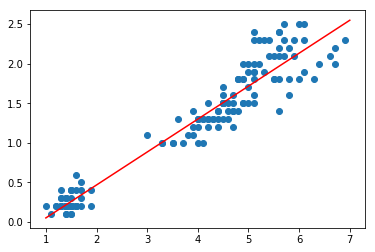

In [63]:
plt.scatter(df.petal_length, df.petal_width)
x = np.arange(1,8)
plt.plot(x, x*lm.coef_  + lm.intercept_ , 'r')

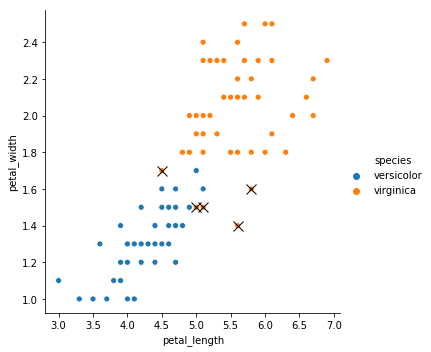

In [71]:
sns.relplot('petal_length', 'petal_width', hue='species', data=df[df.species != 'setosa'])
miss = df[(df.species=='virginica') & (df.petal_width<1.8)]
plt.plot(miss.petal_length, miss.petal_width, 'xk', markersize=10)

## But we want to quantify how good it is
 - What measures of model quality have we already talked about?

## We still need to know actual labels to calculated accuracy score or MSE
 - Where do we get data with labels for that?

## Option 1: Use the same data we used for training
 - Training accuracy

## Overfitting
 - Overfitting is like learning through memorization. Rather than understanding the concepts at play and making generalizations you simply memorize what you’ve seen.
 - We want the model (or student) to internalize the essence and to **generalize** from examples, not memorize them
 
 - Some good discussion [on Quora](https://www.quora.com/What-is-overfitting)

## kNN with k=1 example

## Train / test split
![split](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/images/05_train_test_split.png)

## How to split?
 - Let's try to use 1/3 of the iris data for training

In [73]:
df.shape

(150, 5)

In [74]:
from sklearn.model_selection import train_test_split

In [81]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df.species

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67)

In [88]:
y_train.shape

(49,)

## Random state / seed

In [90]:
np.random.rand(3)

array([0.03805366, 0.75046049, 0.35330927])

In [37]:
rng1 = np.random.RandomState(seed=42)
rng2 = np.random.RandomState(seed=42)

In [38]:
a = rng1.rand(10)
b = rng2.rand(10)

In [39]:
print(a)
print(b)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


![overfitting](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/images/05_overfitting.png)